In [ ]:
# algo trading
# https://www.youtube.com/watch?v=YLq0yuB6-Ns
# https://analyticsindiamag.com/hands-on-guide-to-using-yfinance-api-in-python/
# https://blog.quantinsti.com/stock-market-data-analysis-python/
# to use 'yahoofinancials' not 'yfinance', see https://towardsdatascience.com/a-comprehensive-guide-to-downloading-stock-prices-in-python-2cd93ff821d4

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
from nsetools import Nse
nse = Nse()
import nsepy as npy

In [2]:
data = pd.read_csv('C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/EQUITY_L.csv')

In [3]:
data.head()

,SYMBOL,NAME OF COMPANY,SERIES,DATE OF LISTING,PAID UP VALUE,MARKET LOT,ISIN NUMBER,FACE VALUE
0,20MICRONS,20 Microns Limited,EQ,06-OCT-2008,5,1,INE144J01027,5
1,21STCENMGM,21st Century Management Services Limited,EQ,03-MAY-1995,10,1,INE253B01015,10
2,3IINFOTECH,3i Infotech Limited,BE,22-APR-2005,10,1,INE748C01020,10
3,3MINDIA,3M India Limited,EQ,13-AUG-2004,10,1,INE470A01017,10
4,3PLAND,3P Land Holdings Limited,EQ,19-JUL-1995,2,1,INE105C01023,2


In [4]:
y_data = pd.read_excel('C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/y_ticker_nse.xlsx')

In [5]:
y_data.head()

,Ticker,Name,Category Name
0,20MICRONS.NS,20 Microns Limited,Industrial Metals & Minerals
1,3IINFOTECH.NS,3i Infotech Limited,Information Technology Services
2,3IINFOTECH-BE.NS,3I INFOTECH LTD.,NaN
3,3IINFOTECH-EQ.NS,3I INFOTECH LTD INR10,NaN
4,3MINDIA.NS,3M India Limited,Conglomerates


In [17]:
# sp_data = yf.download('3Mindia', start='2021-07-01', end = datetime.datetime.today(), interval = '1d' )

ticker = 'SBIN.NS'
sp_data = yf.download(ticker, start=datetime.datetime.today()-datetime.timedelta(90), end = datetime.datetime.today(), interval = '1d', progress = False)


In [18]:
sp_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-08,361.000000,363.299988,354.299988,355.600006,352.346954,33370259
2021-04-09,354.399994,364.500000,351.200012,353.000000,349.770721,46473100
2021-04-12,344.000000,344.000000,322.549988,328.850006,325.841675,75501713
2021-04-13,332.000000,342.250000,330.500000,341.000000,337.880524,49773360
2021-04-15,342.100006,347.549988,336.100006,342.700012,339.564972,52992349


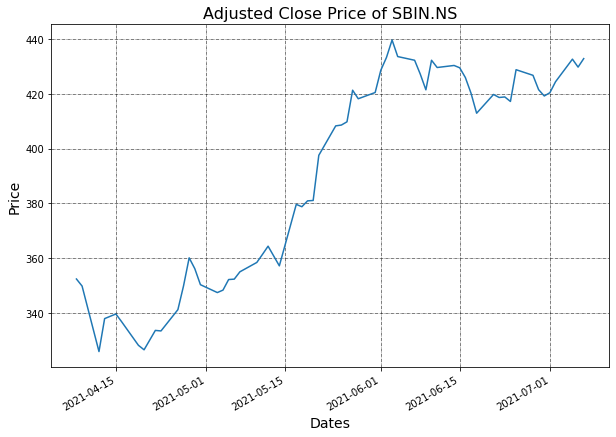

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
sp_data['Adj Close'].plot(figsize=(10, 7))
# Define the label for the title of the figure
plt.title("Adjusted Close Price of %s" % ticker, fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Dates', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
# Show the plot
plt.show()

In [53]:
tickers_list = ['MARICO.NS', 'MAANALU.NS']
specific_data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    
     specific_data[ticker] = yf.download(ticker, start=datetime.datetime.today()-datetime.timedelta(90), end = datetime.datetime.today(), interval = '1d', progress = False)['Adj Close']

# Print first 5 rows of the data
specific_data.head()

,MARICO.NS,MAANALU.NS
Date,,
2021-04-08,414.649994,156.500000
2021-04-09,420.600006,162.750000
2021-04-12,407.399994,146.449997
2021-04-13,421.299988,147.699997
2021-04-15,423.299988,159.350006


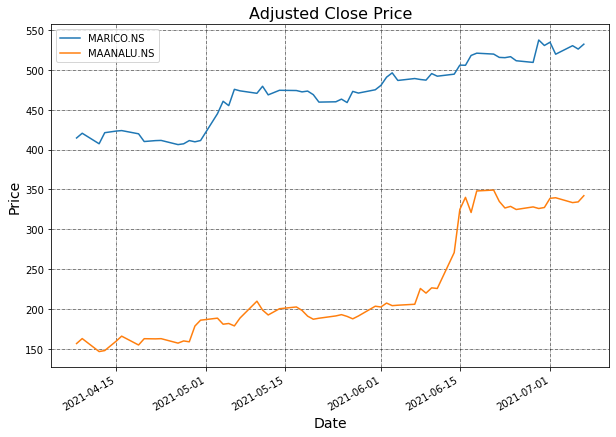

In [54]:
# Plot all the close prices
specific_data.plot(figsize=(10, 7))
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [37]:
# get price to book
sbi = yf.Ticker("SBIN.NS")
pb = sbi.info['priceToBook']
pe = sbi.info['regularMarketPrice']/sbi.info['trailingEps']
print('Price to Book Ratio is: %.2f' % pb)
print('Price to Earnings Ratio is: %.2f' % pe)

Price to Book Ratio is: 1.40
Price to Earnings Ratio is: 17.24


In [35]:

new_dict = sbi.info
my_list = list(new_dict.keys())
my_list.sort()

print(my_list)

['52WeekChange', 'SandP52WeekChange', 'address1', 'address2', 'algorithm', 'annualHoldingsTurnover', 'annualReportExpenseRatio', 'ask', 'askSize', 'averageDailyVolume10Day', 'averageVolume', 'averageVolume10days', 'beta', 'beta3Year', 'bid', 'bidSize', 'bookValue', 'category', 'circulatingSupply', 'city', 'companyOfficers', 'country', 'currency', 'currentPrice', 'currentRatio', 'dateShortInterest', 'dayHigh', 'dayLow', 'debtToEquity', 'dividendRate', 'dividendYield', 'earningsGrowth', 'earningsQuarterlyGrowth', 'ebitda', 'ebitdaMargins', 'enterpriseToEbitda', 'enterpriseToRevenue', 'enterpriseValue', 'exDividendDate', 'exchange', 'exchangeTimezoneName', 'exchangeTimezoneShortName', 'expireDate', 'fax', 'fiftyDayAverage', 'fiftyTwoWeekHigh', 'fiftyTwoWeekLow', 'financialCurrency', 'fiveYearAverageReturn', 'fiveYearAvgDividendYield', 'floatShares', 'forwardEps', 'forwardPE', 'freeCashflow', 'fromCurrency', 'fullTimeEmployees', 'fundFamily', 'fundInceptionDate', 'gmtOffSetMilliseconds', '

In [38]:
sbi.financials

,2021-03-31,2020-03-31,2019-03-31,2018-03-31
Research Development,None,None,None,None
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,238878149000.0,211399689000.0,33505535000.0,-118067540000.0
Minority Interest,96259166000.0,79438220000.0,60369913000.0,46152451000.0
Net Income,224054576000.0,197678022000.0,22996391000.0,-45562900000.0
Selling General Administrative,732218984000.0,673098139000.0,611819825000.0,517318804000.0
Gross Profit,1733420447000.0,1441768315000.0,1174029021000.0,839091015790.0
Ebit,0.0,0.0,0.0,0.0
Operating Income,229124494000.0,123952685000.0,26025941000.0,-122454174210.0
Other Operating Expenses,772076969000.0,644717491000.0,536183255000.0,444226386000.0


In [ ]:
# show income statement
sbi.financials
# show balance heet
sbi.balance_sheet
# show cashflow
sbi.cashflow
# show other info
sbi.info

In [3]:
aa = yf.Ticker('NTPC.NS').actions

In [5]:
aa.head()

,Dividends,Stock Splits
Date,,
2005-02-25,1.000000,0.0
2005-09-08,1.000000,0.0
2006-02-13,1.666667,0.0
2006-08-30,0.666667,0.0
2007-02-02,2.000000,0.0


In [4]:
yf.Ticker('ZUARI.NS').isin

'INE840M01016'

In [8]:
yf.Ticker('NTPC.NS').isin

'INE733E01010'

In [9]:
yf.Ticker('NTPC.NS').calendar

,0,1
Earnings Date,2021-08-12 00:00:00,2021-08-16 00:00:00
Earnings Average,None,None
Earnings Low,None,None
Earnings High,None,None
Revenue Average,224516000000,224516000000
Revenue Low,224516000000,224516000000
Revenue High,224516000000,224516000000


In [28]:
q = nse.get_quote('infy')
q

{'pricebandupper': 1736.8,
 'symbol': 'INFY',
 'applicableMargin': 15.31,
 'bcEndDate': None,
 'totalSellQuantity': None,
 'adhocMargin': None,
 'companyName': 'Infosys Limited',
 'marketType': 'N',
 'exDate': '31-MAY-21',
 'bcStartDate': None,
 'css_status_desc': 'Listed',
 'dayHigh': 1586.75,
 'basePrice': 1578.95,
 'securityVar': 11.81,
 'pricebandlower': 1421.1,
 'sellQuantity5': None,
 'sellQuantity4': None,
 'sellQuantity3': None,
 'cm_adj_high_dt': '30-JUN-21',
 'sellQuantity2': None,
 'dayLow': 1557.1,
 'sellQuantity1': None,
 'quantityTraded': 4089574.0,
 'pChange': '-1.14',
 'totalTradedValue': 64414.88,
 'deliveryToTradedQuantity': 55.57,
 'totalBuyQuantity': 25.0,
 'averagePrice': 1575.1,
 'indexVar': None,
 'cm_ffm': 579155.41,
 'purpose': 'ANNUAL GENERAL MEETING/DIVIDEND - RS 15 PER SHARE',
 'buyPrice2': None,
 'secDate': '06-Jul-2021 00:00:00',
 'buyPrice1': 1562.2,
 'high52': 1591.0,
 'previousClose': 1578.95,
 'ndEndDate': None,
 'low52': 761.5,
 'buyPrice4': None,
 'b

<AxesSubplot:title={'center':"Marico's stock price"}, xlabel='Date'>

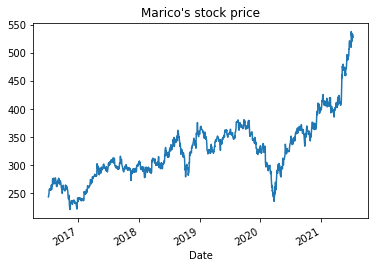

In [6]:
# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max

ticker_1 = yf.Ticker("MARICO.NS")
#ticker_2 = yf.Ticker("MAANALU.NS")

#ticker_1_df = ticker_1.history(period="max")
#ticker_2_df = ticker_2.history(period="max")
ticker_1_df = ticker_1.history(period="5y")

ticker_1_df['Close'].plot(title="Marico's stock price")
#ticker_2_df['Close'].plot(title="Maanalu's stock price")

<AxesSubplot:xlabel='Date'>

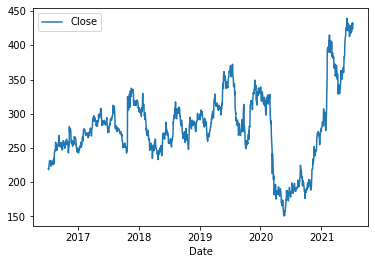

In [16]:
sbi_data = npy.get_history(symbol="SBIN", start=datetime.date(2016,7,7), end=datetime.date(2021,7,8))
sbi_data[['Close']].plot()

In [17]:
sbi_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2016-07-07,SBIN,EQ,223.50,223.90,224.60,219.35,220.15,220.05,222.32,12917872,2.871840e+14,68075,4030925,0.3120
2016-07-08,SBIN,EQ,220.05,220.15,220.85,216.50,218.20,218.30,218.11,16017389,3.493621e+14,96813,5367678,0.3351
2016-07-11,SBIN,EQ,218.30,223.60,225.45,222.00,224.50,224.70,223.59,15831791,3.539856e+14,82208,5654844,0.3572
2016-07-12,SBIN,EQ,224.70,225.00,227.20,224.15,226.75,226.70,226.10,19374179,4.380495e+14,96849,7895882,0.4075
2016-07-13,SBIN,EQ,226.70,227.00,228.50,223.95,226.75,227.70,226.83,18377333,4.168619e+14,102415,5491345,0.2988


In [18]:
## following 3 cells are to dump the data in this computer and then read again so that we do not have to do npy.get_history
## again. 

import pickle

with open('sbi_5y_data', 'wb') as f:
    pickle.dump(sbi_data, f)

In [19]:
def get_hist_data():
    with open('sbi_5y_data', 'rb') as f:
        return pickle.load(f)    

In [23]:
sbi_historical_data = get_hist_data()
sbi_historical_data.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-07-02,SBIN,EQ,420.40,420.30,425.4,419.00,424.8,424.40,422.72,16423811,6.942676e+14,150826,4269757,0.2600
2021-07-05,SBIN,EQ,424.40,426.50,434.5,424.25,433.7,432.65,428.55,16483761,7.064127e+14,153743,5660728,0.3434
2021-07-06,SBIN,EQ,432.65,431.70,436.5,428.20,429.3,429.75,433.45,20195278,8.753558e+14,209939,5413566,0.2681
2021-07-07,SBIN,EQ,429.75,429.35,434.0,427.55,433.0,432.85,431.00,14473774,6.238136e+14,130765,3715611,0.2567
2021-07-08,SBIN,EQ,432.85,432.80,435.4,422.10,424.5,424.45,429.03,21433043,9.195494e+14,215558,5669467,0.2645


In [15]:
len(sbi_historical_data)

1360

In [26]:
ticker = 'SBIN.NS'
sbi_y_data = yf.download(ticker, start=datetime.datetime.today()-datetime.timedelta(5*365+2), end = datetime.datetime.today(), interval = '1d', progress = False)


In [29]:
sbi_y_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-02,420.299988,425.399994,419.000000,424.399994,424.399994,16423811
2021-07-05,426.500000,434.500000,424.250000,432.649994,432.649994,16483761
2021-07-06,431.700012,436.500000,428.200012,429.750000,429.750000,20195278
2021-07-07,429.350006,434.000000,427.549988,432.850006,432.850006,14473774
2021-07-08,432.799988,435.399994,422.100006,424.450012,424.450012,21423955


In [30]:
print(len(sbi_historical_data))
print(len(sbi_y_data))
print(len(sbi_data))

1240
1234
1240


In [59]:
## Calculating CAGR : compounded anual growth rate
## in the following, we have considered 'Adj Close' column to calculate CAGR
## cagr = ((current_price - start_price)**(1/t)) - 1
## t = no. of years between start and end price, periods = no. of trading days in a year

def get_CAGR(df,periods, price_col_name = 'Adj Close'):
    t = len(df) / periods                               
    cagr = (df[price_col_name][-1] / df[price_col_name][0]) ** (1/t) - 1
    return cagr

In [8]:
ticker = 'SBIN.NS'
sbi_test_data = yf.download(ticker, start=datetime.datetime.today()-datetime.timedelta(365), end = datetime.datetime.today(), interval = '1d', progress = False)


In [52]:
len(sbi_test_data)

251

In [38]:
x,y = get_CAGR(sbi_test_data, 251)
print(x)
print(y)

1.2322499185278208
1.0


In [45]:
def get_CAGR_inv(investment, current_value, periods):  ## periods in days
    t = periods / 365.25                              
    cagr = (current_value / investment) ** (1/t) - 1
    return cagr

In [49]:
get_CAGR_inv(100000, 200000, 365*7)

0.10416439845720604

In [51]:
## volatility : how much volatility per year i.e. how volatile your portfolio is
## volatility = std deviation(returns) X squareroot(#periods)
## periods = periods per year i.e. 52 weeks, 12 months, no. of trading days etc. depending on data

def get_volatility(df_original, periods, price_col_name = 'Adj Close'):
    df = df_original.copy()
    df['periodic_return'] = df[price_col_name].pct_change()
    return df['periodic_return'].std() * (periods**0.5)

In [53]:
get_volatility(sbi_test_data, 251)

0.37870543264373435

In [65]:
## Sharpe ratio i.e. risk adjusted return - the higher the better
## ratio = (CAGR - RFR) / volatility, where RFR = Risk free rate(returns of assets with 0% risk)
## RFR is generally US 10 year treasury rate which is around 1.63% now
## we may consider this as our savings bank rate i.e.4%

def get_sharpe_ratio(df_original, periods, risk_free_rate, price_col_name = 'Adj Close'):
    return (get_CAGR(df_original,periods, price_col_name = price_col_name) - risk_free_rate)/get_volatility(df_original, periods, price_col_name = price_col_name)


In [60]:
get_sharpe_ratio(sbi_test_data, 251, 0.0163)  # with US 10 year treasury interest rate

3.2108066420893437

In [61]:
get_sharpe_ratio(sbi_test_data, 251, 0.04)  # with our savings bank interest rate

3.1482250207100284

In [62]:
# negative annualised volatility i.e. how much negative volatility per year 
# This is almost same as volatility but we take the standard deviation of returns only when the value of portfolio drops or 
# returns of negative days
# negative volatility = std deviation(returns when value drops) X squareroot(#periods)
# negative volatility is less than total volatility since total volatility takes care of positive volatolity also

def get_negative_volatility(df_original, periods, price_col_name = 'Adj Close'):
    df = df_original.copy()
    df['periodic_return'] = df[price_col_name].pct_change()
    return df[df['periodic_return']<0]['periodic_return'].std() * (periods**0.5)

In [63]:
get_negative_volatility(sbi_test_data, 251)

0.22000468311975838

In [66]:
# Sortino ratio
# ratio = (CAGR - RFR) / negative_volatility, where RFR = Risk free rate(returns of assets with 0% risk)

def get_sortino_ratio(df_original, periods, risk_free_rate, price_col_name = 'Adj Close'):
    return (get_CAGR(df_original,periods, price_col_name = price_col_name) - risk_free_rate)/get_negative_volatility(df_original, periods, price_col_name = price_col_name)


In [67]:
get_sortino_ratio(sbi_test_data, 251, 0.0163)

5.526927433021619

In [68]:
# Maximum drawdown that measures the most the stock falls from its peak i.e. downside risk
# ratio = (peak high - trough low) / peak high

def get_max_drawdown(df_original, price_col_name = 'Adj Close'):
    df = df_original.copy()
    df['periodic_return'] = df[price_col_name].pct_change()
    df['cum_return'] = (1 + df['periodic_return']).cumprod()
    df['cum_roll_max'] = df['cum_return'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cum_return']
    df['drawdown_pct'] = df['drawdown'] / df['cum_roll_max']
    return df['drawdown_pct'].max()

In [69]:
get_max_drawdown(sbi_test_data)

0.21569935852189487

In [78]:
## summary

def print_strategy_summary(name, periods, df_original, risk_free_rate, price_col_name = 'Adj Close'):
    print(name)
    print('CAGR : ', format(get_CAGR(df_original,periods, price_col_name = price_col_name)))
    print('Volatility : ', format(get_volatility(df_original, periods, price_col_name = price_col_name)))
    print('Sharpe Ratio : ', format(get_sharpe_ratio(df_original, periods, risk_free_rate, price_col_name = price_col_name)))
    print('Negative Volatility : ', format(get_negative_volatility(df_original, periods, price_col_name = price_col_name)))
    print('Sortino Ratio : ', format(get_sortino_ratio(df_original, periods, risk_free_rate, price_col_name = price_col_name)))
    print('Max Drawdown : ', format(get_max_drawdown(df_original, price_col_name = price_col_name)))

In [79]:
print_strategy_summary('SBIN', 251, sbi_test_data, .0163)

SBIN
CAGR :  1.2322499185278208
Volatility :  0.37870543264373435
Sharpe Ratio :  3.2108066420893437
Negative Volatility :  0.22000468311975838
Sortino Ratio :  5.526927433021619
Max Drawdown :  0.21569935852189487


In [25]:
# Moving Average, ewm = exponential weighted moving average, span = how many periods, in no. of 'interval', is it averaging
# over. Since we had loaded data with 'interval' = 1d, span should be in no. of days. min_periods = after how many intervals
# averaging should start. It is better to keep span = min_periods for this.
sbi = sbi_test_data.copy()
sbi['mov_av'] = sbi['Adj Close'].ewm(3, min_periods = 3).mean()

In [28]:
sbi.head()


,Open,High,Low,Close,Adj Close,Volume,mov_av
Date,,,,,,,
2020-07-09,192.800003,201.000000,192.550003,199.100006,197.278625,89539723,NaN
2020-07-10,198.000000,202.500000,194.800003,195.600006,193.810638,111406477,NaN
2020-07-13,198.800003,199.800003,191.600006,192.699997,190.937164,61949761,193.411619
2020-07-14,192.300003,192.300003,184.600006,186.050003,184.348007,62239932,190.096927
2020-07-15,187.949997,189.949997,183.000000,183.800003,182.118591,58527305,187.481749


In [34]:
# 50,100,200 DMA :
sbi = sbi_test_data.copy()
#sbi['mov_sum'] = sbi['Adj Close'].rolling(3, min_periods = 3).sum()
sbi['50_dma'] = sbi['Adj Close'].rolling(50, min_periods = 50).mean()
# 50 dma as % of adj close
sbi['50_dma_%'] = sbi['50_dma'] / sbi['Adj Close']
sbi['100_dma'] = sbi['Adj Close'].rolling(100, min_periods = 100).mean()
sbi['200_dma'] = sbi['Adj Close'].rolling(200, min_periods = 200).mean()
sbi.tail(10)

,Open,High,Low,Close,Adj Close,Volume,50_dma,50_dma_%,100_dma,200_dma
Date,,,,,,,,,,
2021-06-28,430.700012,433.149994,424.549988,426.750000,426.750000,29370660,390.864669,0.915910,381.710022,307.829790
2021-06-29,427.500000,428.950012,420.549988,421.500000,421.500000,22275961,392.558858,0.931338,382.846445,308.907299
2021-06-30,423.000000,424.899994,418.299988,419.200012,419.200012,18337773,394.380446,0.940793,383.737917,309.992383
2021-07-01,420.299988,423.700012,417.149994,420.399994,420.399994,16161469,396.258732,0.942575,384.613150,311.129045
2021-07-02,420.299988,425.399994,419.000000,424.399994,424.399994,16423811,398.075325,0.937972,385.338635,312.269359
2021-07-05,426.500000,434.500000,424.250000,432.649994,432.649994,16483761,400.060882,0.924676,385.770096,313.428380
2021-07-06,431.700012,436.500000,428.200012,429.750000,429.750000,20195278,401.832876,0.935039,386.133418,314.593709
2021-07-07,429.350006,434.000000,427.549988,432.850006,432.850006,14473774,403.493471,0.932179,386.550035,315.766364
2021-07-08,432.799988,435.399994,422.100006,424.450012,424.450012,21433043,404.780959,0.953660,386.907918,316.906680
